In [1]:
import pandas as pd
from utils import RecommendationSystem, Clustering

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
recommendation_system = RecommendationSystem(
    rating_data_query="""
        SELECT
            r.user_id,
            r.anime_id,
            r.rating
        FROM animes_ratings r
        INNER JOIN animes_catalog c
        ON
            r.anime_id = c.anime_id
        WHERE
            c.deleted = False
        ORDER BY RANDOM()
        LIMIT 16598;
    """,
    user_id_col="user_id",
    item_id_col="anime_id",
    rating_col="rating",
    min_rating=1,
    max_rating=10
)

Executing query 
        SELECT
            r.user_id,
            r.anime_id,
            r.rating
        FROM animes_ratings r
        INNER JOIN animes_catalog c
        ON
            r.anime_id = c.anime_id
        WHERE
            c.deleted = False
        ORDER BY RANDOM()
        LIMIT 16598;
    


In [3]:
knn_results = recommendation_system.evaluate_params(
    model="knn",
    model_param_grid={
        "k": list(range(10, 101, 10)),
        "sim_options": {
            "name": ["msd", "cosine"],
            "user_based": [True],
        },
    },
    number_cross_validations=3
)
print(f'Best params for KNN model: {knn_results.best_params["rmse"]} with an RMSE score {knn_results.best_score["rmse"]}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

<Axes: xlabel='param_k'>

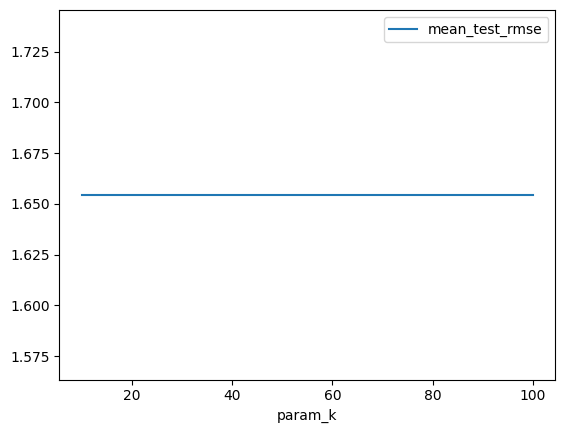

In [4]:
knn_results_k = pd.DataFrame(knn_results.cv_results)
knn_results_k[["param_k", "mean_test_rmse"]].set_index("param_k").plot()

In [5]:
svd_results = recommendation_system.evaluate_params(
    model="svd",
    model_param_grid={
        "n_factors": list(range(25, 201, 25)),
        "lr_all": [x/1000 for x in range(1, 10)],
        "reg_all": [x/100 for x in range(1, 10)]
    },
    number_cross_validations=3
)
print(f'Best params for SVD model: {svd_results.best_params["rmse"]} with an RMSE score {svd_results.best_score["rmse"]}')

Best params for SVD model: {'n_factors': 25, 'lr_all': 0.009, 'reg_all': 0.09} with an RMSE score 1.48849766520191


<Axes: xlabel='param_reg_all'>

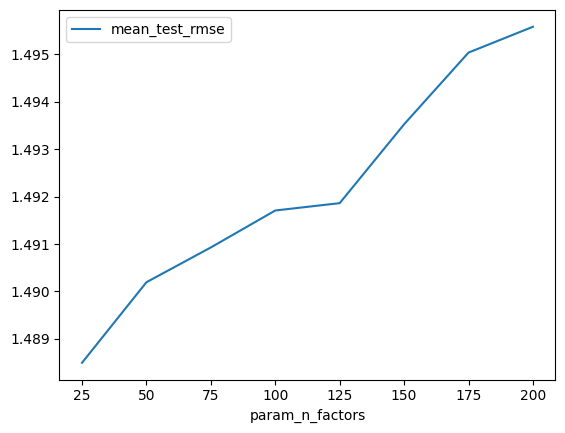

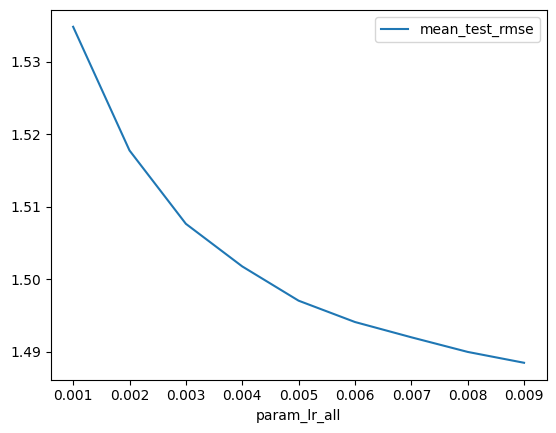

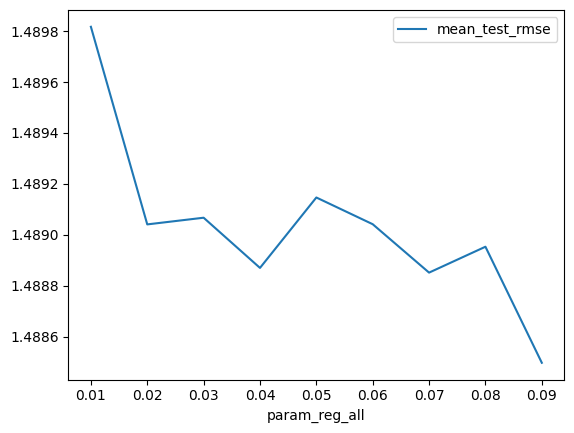

In [6]:
best_n_factors = svd_results.best_params["rmse"]["n_factors"]
best_lr_all = svd_results.best_params["rmse"]["lr_all"]
best_reg_all = svd_results.best_params["rmse"]["reg_all"]

svd_results_df = pd.DataFrame(svd_results.cv_results)

svd_results_n_factors = svd_results_df[
    (svd_results_df["param_lr_all"] == best_lr_all) &
    (svd_results_df["param_reg_all"] == best_reg_all)
]
svd_results_n_factors[["param_n_factors", "mean_test_rmse"]].set_index("param_n_factors").plot()

svd_results_lr_all = svd_results_df[
    (svd_results_df["param_n_factors"] == best_n_factors) &
    (svd_results_df["param_reg_all"] == best_reg_all)
]
svd_results_lr_all[["param_lr_all", "mean_test_rmse"]].set_index("param_lr_all").plot()

svd_results_reg_all = svd_results_df[
    (svd_results_df["param_n_factors"] == best_n_factors) &
    (svd_results_df["param_lr_all"] == best_lr_all)
]
svd_results_reg_all[["param_reg_all", "mean_test_rmse"]].set_index("param_reg_all").plot()

In [7]:
svd_results = recommendation_system.evaluate_execution_time(
    model="svd",
    model_params=svd_results.best_params["rmse"],
    number_cross_validations=100
)

In [8]:
knn_results = recommendation_system.evaluate_execution_time(
    model="knn",
    model_params=knn_results.best_params["rmse"],
    number_cross_validations=100
)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

<Axes: >

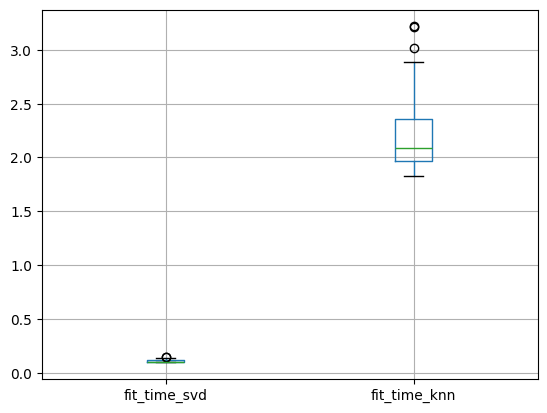

In [9]:
svd_results_df = pd.DataFrame(svd_results)
knn_results_df = pd.DataFrame(knn_results)

df = pd.concat([svd_results_df["fit_time"], knn_results_df["fit_time"]], axis=1)
df.columns = ["fit_time_svd", "fit_time_knn"]
df.boxplot()

In [10]:
recommendation_system = RecommendationSystem(
    rating_data_query="""
        SELECT
            r.user_id,
            r.anime_id,
            r.rating
        FROM animes_ratings r
        INNER JOIN animes_catalog c
        ON
            r.anime_id = c.anime_id
        WHERE
            c.deleted = False;
    """,
    user_id_col="user_id",
    item_id_col="anime_id",
    rating_col="rating",
    min_rating=1,
    max_rating=10
)

Executing query 
        SELECT
            r.user_id,
            r.anime_id,
            r.rating
        FROM animes_ratings r
        INNER JOIN animes_catalog c
        ON
            r.anime_id = c.anime_id
        WHERE
            c.deleted = False;
    


In [11]:
knn_model = recommendation_system.train_model(
    model="knn",
    model_params={
        "k": 10,
        "sim_options": {
            "name": "msd",
            "user_based": True
        }
    },
    test_size_pct=0.2
)

Computing the msd similarity matrix...


c:\Users\david\Documents\repos\anime-project\sagemaker\utils.py:227: DeprecationWarning: invalid escape sequence '\.'
  self.__texts = [re.sub("[,\.!?]", "", s) for s in self.__texts]


MemoryError: Unable to allocate 35.3 GiB for an array with shape (68860, 68860) and data type float64

In [12]:
svd_model = recommendation_system.train_model(
    model="svd",
    model_params={
        "n_factors": 25,
        "n_epochs": 200,
        "lr_all": 0.009,
        "reg_all": 0.09
    },
    test_size_pct=0.2
)

RMSE: 1.1264
1.1264444064268162


In [13]:
user_to_recommend = 49785

recommendation_system.predict_recommendations(
    items_query=f"""
        SELECT
            anime_id,
            name
        FROM animes_catalog
        WHERE 
            anime_id not in (
                SELECT
                    anime_id
                FROM animes_ratings
                WHERE user_id = {user_to_recommend}
            )
            AND deleted = False;
    """,
    items_id_col="anime_id",
    items_name_col="name",
    user_id=user_to_recommend,
    num_recos=10,
    threshold=6
)

Executing query 
        SELECT
            anime_id,
            name
        FROM animes_catalog
        WHERE 
            anime_id not in (
                SELECT
                    anime_id
                FROM animes_ratings
                WHERE user_id = 49785
            )
            AND deleted = False;
    


,user_id,anime_id,anime_name,rating
0,49785,820,Ginga Eiyuu Densetsu,9.11
1,49785,8353,Ketsuinu,8.85
2,49785,30743,Kanagatari. Kanabakari.: Kanadian Families,8.84
3,49785,32400,KochinPa!,8.77
4,49785,29722,"Eikoku Ikka, Nihon wo Taberu",8.68
5,49785,28977,Gintama°,8.58
6,49785,9969,Gintama,8.51
7,49785,15417,Gintama: Enchousen,8.50
8,49785,22455,Hello Kitty no Circus ga Yatte Kita,8.37
9,49785,918,Gintama,8.37


In [14]:
clustering = Clustering(
    data_query="""
        SELECT 
            c.anime_id,
            c.type,
            cst.synopsis_topic_1,
            cst.synopsis_topic_2,
            cst.synopsis_topic_3
        FROM animes_catalog c
        INNER JOIN animes_catalog_synopsis_topics cst
            ON cst.anime_id = c.anime_id 
        WHERE c.deleted = False;
    """,
    features_replace_values={
        "type": {
            "TV": "1",
            "Special": "2",
            "ONA": "3",
            "Music": "4",
            "Movie": "5",
            "OVA": "6",
            "": "7"
        }
    }
)

Executing query 
        SELECT 
            c.anime_id,
            c.type,
            cst.synopsis_topic_1,
            cst.synopsis_topic_2,
            cst.synopsis_topic_3
        FROM animes_catalog c
        INNER JOIN animes_catalog_synopsis_topics cst
            ON cst.anime_id = c.anime_id 
        WHERE c.deleted = False;
    


c:\Users\david\Documents\repos\anime-project\sagemaker\utils.py:335: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(self.replace_values[col])
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X

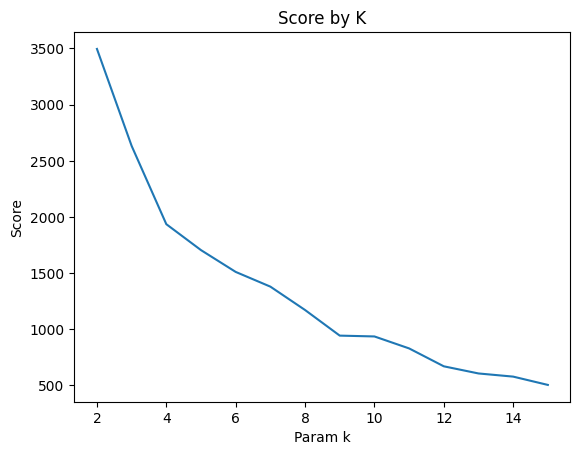

In [15]:
clustering.get_elbow_plot(
    k_options=range(2, 16),
    model_features_list=["type", "synopsis_topic_1", "synopsis_topic_2", "synopsis_topic_3"],
    cv=3
)

In [16]:
clustering.train_model(k=4)

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
pred_df = clustering.predict_clusters()
pred_df.head()

,anime_id,type,synopsis_topic_1,synopsis_topic_2,synopsis_topic_3,cluster
0,2904,TV,0.1089,0.7038,0.1872,4
1,32324,Special,0.0221,0.0212,0.9567,2
2,9361,Music,0.4820,0.0391,0.4788,3
3,29501,Special,0.7860,0.1863,0.0277,2
4,30425,Music,0.8584,0.0614,0.0803,3


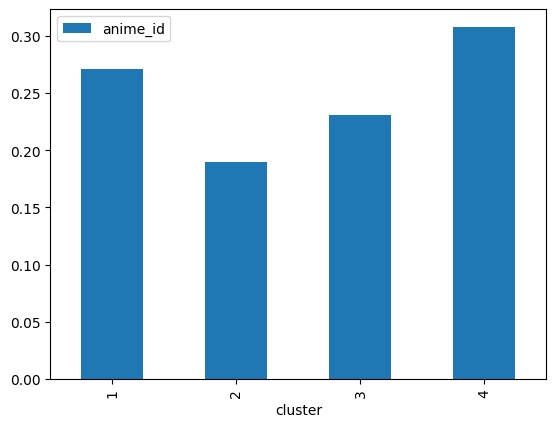

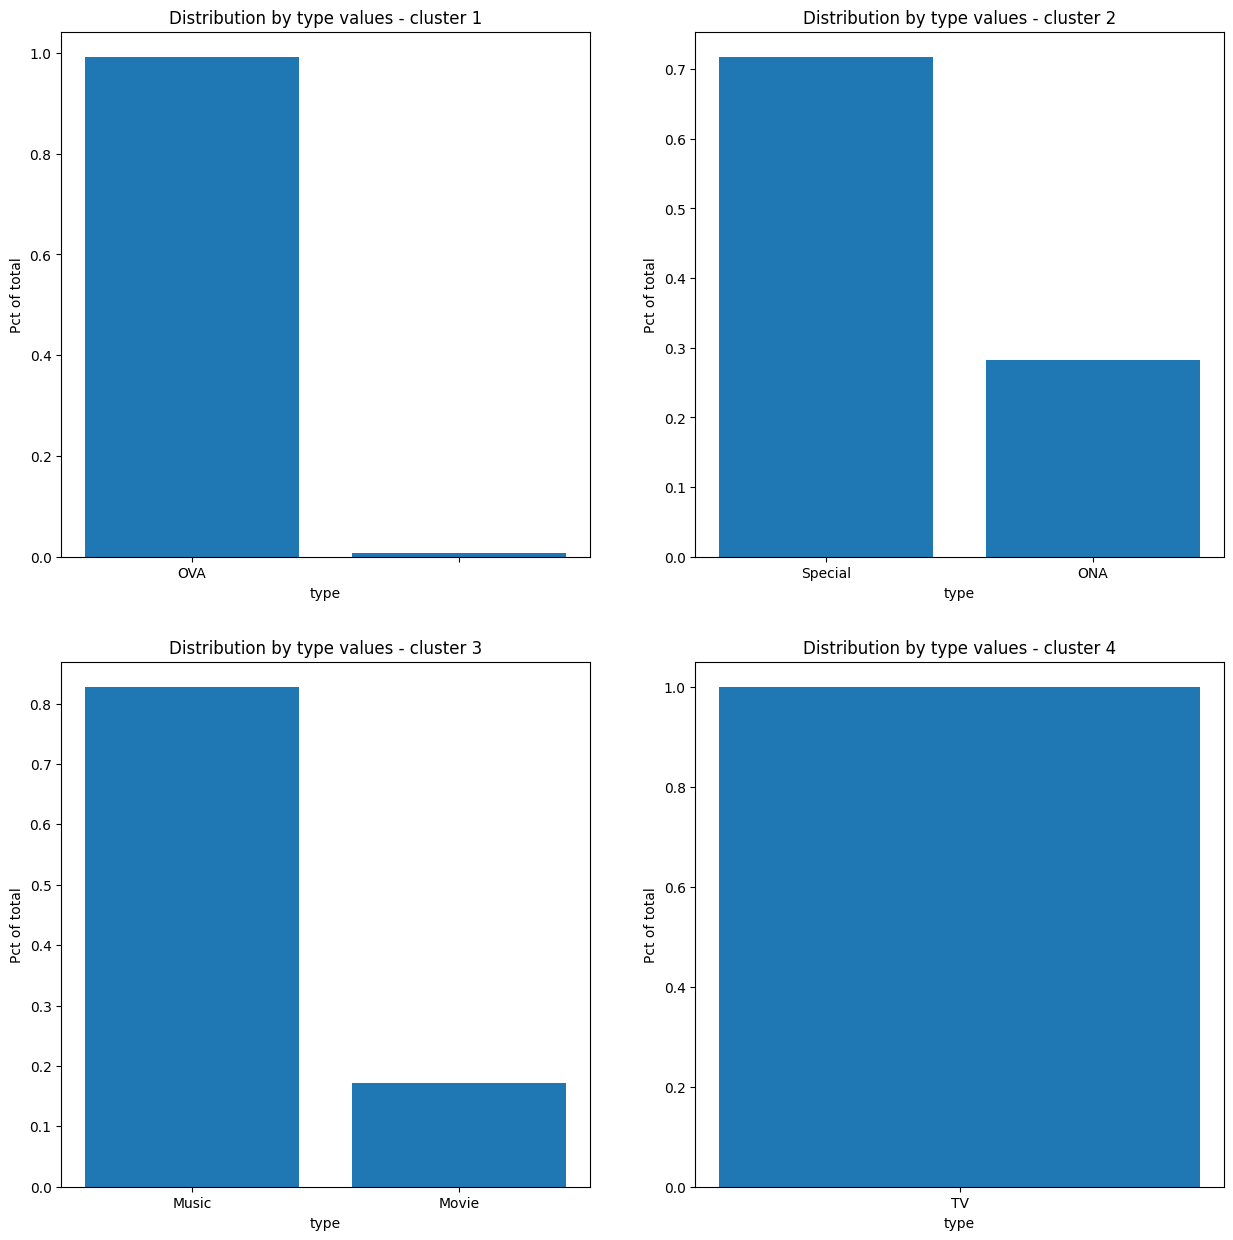

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


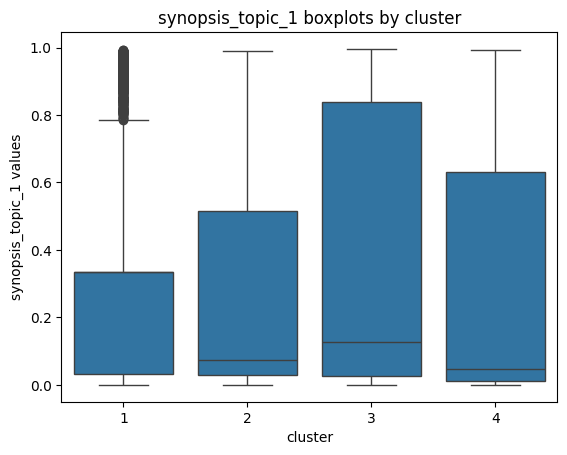

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


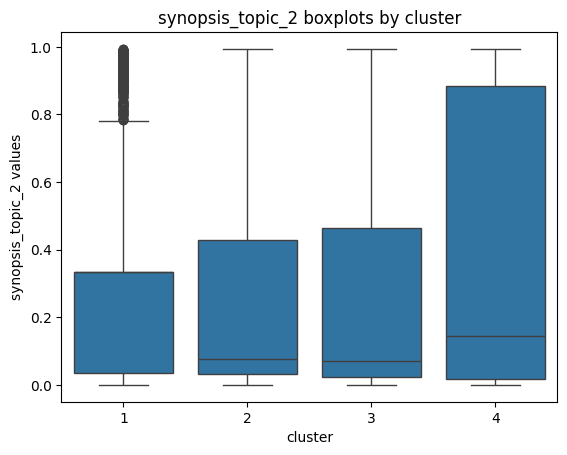

c:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


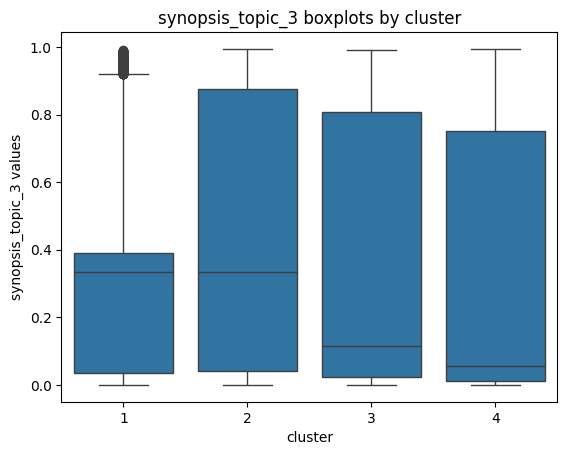

In [18]:
clustering.get_cluster_graphics(
    qualitative_vars=["type"],
    quantitative_vars=["synopsis_topic_1", "synopsis_topic_2", "synopsis_topic_3"]
)